In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
level_df=pd.read_csv("./final_dataset.csv")

In [3]:
level_df.head()

,n_beginner,n_intermediate,n_advance,accuracy_beginner,accuracy_intermediate,accuracy_advance,%_beginner,%_intermediate,%_advance,new_beginner,new_intermediate,new_advance
0,3,4,3,0.585567,0.716942,0.278396,-0.36,0.44,-0.60,2,7,1
1,2,0,8,0.578313,1.000000,0.061586,-0.36,0.75,-0.72,3,5,2
2,6,4,0,0.046100,0.707588,1.000000,-0.72,0.44,0.75,8,2,0
3,1,4,5,0.095613,0.667447,0.448442,-0.72,0.35,-0.48,1,6,3
4,7,1,2,0.669704,0.408965,0.747877,0.35,-0.48,0.44,5,2,3


In [7]:
question_df=pd.read_excel("./Aptitude_Test_Dataset_final.xlsx")

In [8]:
# Shuffle the DataFrame
question_df = question_df.sample(frac=1).reset_index(drop=True)

In [11]:
question_df.head()

,Question,Option A,Option B,Option C,Option D,Correct Answer,Difficulty Level,Topic,Class
0,What is the value of cos 30° ⋅ cos 60°?,√3/4,1/4,√3/2,1/2,A,Easy,Trigonometry,Class 11
1,If 3 machines can produce 150 units in 5 hours...,300 units,400 units,500 units,600 units,C,Hard,Time and Work,Class 8
2,Determine the solutions for 3x2−5x+2=03x^2 - 5...,"2, 1/3","-2, -1/3","1/3, 2","-1/3, -2",C,Medium,Advanced Algebra,Class 10
3,"Using the identity sec²θ = 1 + tan²θ, find sec...",√5,5/4,√6,5/2,A,Easy,Trigonometry,Class 11
4,A card is drawn from a standard deck. What is ...,1/4,3/13,9/52,3/26,B,Medium,Probability and Statistics,Class 12


In [13]:
question_df["Topic"].unique()

array(['Trigonometry', 'Time and Work', 'Advanced Algebra',
       'Probability and Statistics', 'Triangle Properties',
       'Linear Equations', 'Word Problems', 'Fractions and Decimals',
       'Data Interpretation', 'Number Systems', 'Mensuration',
       'Complex Number Geometry', 'Data Sufficiency', 'Calculus (Basics)',
       'Complex Numbers', 'Simple Algebra', 'Decimals and Fractions',
       'Advanced Trigonometry', 'Algebra', 'Linear Programming',
       'Multiplication and Division', 'Perimeter and Area', 'Vectors',
       'Algebraic Expressions', 'Geometry', 'Number Series',
       'Basic Geometry', 'Ratio and Proportion', 'Angle Properties',
       'Topic', 'Matrices and Determinants', 'Coordinate Geometry',
       'Advanced Calculus', 'Quadratic Equations', 'Sequences and Series',
       'Logical Puzzles', 'Probability', 'Logical Reasoning',
       'Percentage', 'Matrices', 'Parallel Lines and Angles',
       'Inverse Variation', 'Direct Variation'], dtype=object)

In [15]:
question_df["Sub Topic"]=question_df["Topic"].copy()

In [17]:
question_df.head()

,Question,Option A,Option B,Option C,Option D,Correct Answer,Difficulty Level,Topic,Class,Sub Topic
0,What is the value of cos 30° ⋅ cos 60°?,√3/4,1/4,√3/2,1/2,A,Easy,Trigonometry,Class 11,Trigonometry
1,If 3 machines can produce 150 units in 5 hours...,300 units,400 units,500 units,600 units,C,Hard,Time and Work,Class 8,Time and Work
2,Determine the solutions for 3x2−5x+2=03x^2 - 5...,"2, 1/3","-2, -1/3","1/3, 2","-1/3, -2",C,Medium,Advanced Algebra,Class 10,Advanced Algebra
3,"Using the identity sec²θ = 1 + tan²θ, find sec...",√5,5/4,√6,5/2,A,Easy,Trigonometry,Class 11,Trigonometry
4,A card is drawn from a standard deck. What is ...,1/4,3/13,9/52,3/26,B,Medium,Probability and Statistics,Class 12,Probability and Statistics


#### generalising topics in genral topic name

In [20]:
def map_topic(topic):
    if topic in [
        'Simple Algebra', 'Algebraic Expressions', 'Advanced Algebra',
        'Quadratic Equations', 'Linear Equations', 'Ratio and Proportion',
        'Direct Variation', 'Inverse Variation'
    ]:
        return 'Algebra'
    elif topic in [
        'Basic Geometry', 'Coordinate Geometry', 'Trigonometry',
        'Advanced Trigonometry', 'Triangle Properties', 'Perimeter and Area',
        'Angle Properties', 'Complex Number Geometry', 'Parallel Lines and Angles'
    ]:
        return 'Geometry'
    elif topic in [
        'Multiplication and Division', 'Decimals and Fractions',
        'Fractions and Decimals', 'Number Systems', 'Percentage', 'Word Problems'
    ]:
        return 'Arithmetic'
    elif topic in ['Calculus (Basics)', 'Advanced Calculus']:
        return 'Calculus'
    elif topic in ['Matrices', 'Matrices and Determinants']:
        return 'Matrices & Determinants'
    elif topic in ['Probability', 'Probability and Statistics', 'Data Interpretation']:
        return 'Statistics & Probability'
    elif topic in ['Logical Reasoning', 'Logical Puzzles', 'Data Sufficiency']:
        return 'Logical Reasoning'
    elif topic in ['Number Series', 'Sequences and Series']:
        return 'Series & Sequences'
    elif topic in [
        'Linear Programming', 'Time and Work', 'Mensuration', 'Vectors',
        'Complex Numbers'
    ]:
        return 'Miscellaneous/Other Topics'
    else:
        return 'Miscellaneous/Other Topics'

In [22]:
question_df['Topic'] = question_df['Topic'].apply(map_topic)

In [24]:
question_df.head()

,Question,Option A,Option B,Option C,Option D,Correct Answer,Difficulty Level,Topic,Class,Sub Topic
0,What is the value of cos 30° ⋅ cos 60°?,√3/4,1/4,√3/2,1/2,A,Easy,Geometry,Class 11,Trigonometry
1,If 3 machines can produce 150 units in 5 hours...,300 units,400 units,500 units,600 units,C,Hard,Miscellaneous/Other Topics,Class 8,Time and Work
2,Determine the solutions for 3x2−5x+2=03x^2 - 5...,"2, 1/3","-2, -1/3","1/3, 2","-1/3, -2",C,Medium,Algebra,Class 10,Advanced Algebra
3,"Using the identity sec²θ = 1 + tan²θ, find sec...",√5,5/4,√6,5/2,A,Easy,Geometry,Class 11,Trigonometry
4,A card is drawn from a standard deck. What is ...,1/4,3/13,9/52,3/26,B,Medium,Statistics & Probability,Class 12,Probability and Statistics


#### Assigning Topics number

In [27]:
topic_number_mapping = {
    'Algebra': 'Topic 1',
    'Geometry': 'Topic 2',
    'Arithmetic': 'Topic 3',
    'Calculus': 'Topic 4',
    'Matrices & Determinants': 'Topic 5',
    'Statistics & Probability': 'Topic 6',
    'Logical Reasoning': 'Topic 7',
    'Series & Sequences': 'Topic 8',
    'Miscellaneous/Other Topics': 'Topic 9'
}

In [29]:
question_df['Topic_number'] = question_df['Topic'].map(topic_number_mapping)

In [31]:
question_df.head()

,Question,Option A,Option B,Option C,Option D,Correct Answer,Difficulty Level,Topic,Class,Sub Topic,Topic_number
0,What is the value of cos 30° ⋅ cos 60°?,√3/4,1/4,√3/2,1/2,A,Easy,Geometry,Class 11,Trigonometry,Topic 2
1,If 3 machines can produce 150 units in 5 hours...,300 units,400 units,500 units,600 units,C,Hard,Miscellaneous/Other Topics,Class 8,Time and Work,Topic 9
2,Determine the solutions for 3x2−5x+2=03x^2 - 5...,"2, 1/3","-2, -1/3","1/3, 2","-1/3, -2",C,Medium,Algebra,Class 10,Advanced Algebra,Topic 1
3,"Using the identity sec²θ = 1 + tan²θ, find sec...",√5,5/4,√6,5/2,A,Easy,Geometry,Class 11,Trigonometry,Topic 2
4,A card is drawn from a standard deck. What is ...,1/4,3/13,9/52,3/26,B,Medium,Statistics & Probability,Class 12,Probability and Statistics,Topic 6


In [33]:
question_df.to_csv('Question_Dataset.csv', index=False)

In [37]:
df=pd.read_csv("./personalized_learning_dataset_adjusted.csv")

In [ ]:
df.head()

,Quiz1_topic1%,Quiz1_topic2%,Quiz1_topic3%,Quiz1_topic4%,Quiz1_topic5%,Quiz1_topic6%,Quiz1_topic7%,Quiz1_topic8%,Quiz1_topic9%,Quiz2_topic1%,...,Topic9%,Topic1_level,Topic2_level,Topic3_level,Topic4_level,Topic5_level,Topic6_level,Topic7_level,Topic8_level,Topic9_level
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.478545,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0
1,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,...,0.651520,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,...,0.590932,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.323203,0.518791,0.703019,0.363630,0.971782,0.962447,0.251782,0.497249,0.300878,0.284840,...,0.378633,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,...,0.406137,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.corr()["Topic4_level"]

,Topic4_level
Quiz1_topic1%,-0.014896
Quiz1_topic2%,0.001207
Quiz1_topic3%,0.058274
Quiz1_topic4%,-0.291367
Quiz1_topic5%,0.019274
...,...
Topic5_level,-0.052426
Topic6_level,-0.008869
Topic7_level,-0.008433
Topic8_level,0.042303


In [ ]:
pip install keras_tuner

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
import kerastuner as kt
from kerastuner import RandomSearch

In [ ]:
df.head()

,Quiz1_topic1%,Quiz1_topic2%,Quiz1_topic3%,Quiz1_topic4%,Quiz1_topic5%,Quiz1_topic6%,Quiz1_topic7%,Quiz1_topic8%,Quiz1_topic9%,Quiz2_topic1%,...,Topic9%,Topic1_level,Topic2_level,Topic3_level,Topic4_level,Topic5_level,Topic6_level,Topic7_level,Topic8_level,Topic9_level
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.478545,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0
1,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,...,0.651520,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,...,0.590932,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.323203,0.518791,0.703019,0.363630,0.971782,0.962447,0.251782,0.497249,0.300878,0.284840,...,0.378633,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,...,0.406137,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df=pd.get_dummies(df,columns=["Topic1_level","Topic2_level","Topic3_level","Topic4_level","Topic5_level","Topic6_level","Topic7_level","Topic8_level","Topic9_level"],dtype=int)

In [ ]:
df.head()

,Quiz1_topic1%,Quiz1_topic2%,Quiz1_topic3%,Quiz1_topic4%,Quiz1_topic5%,Quiz1_topic6%,Quiz1_topic7%,Quiz1_topic8%,Quiz1_topic9%,Quiz2_topic1%,...,Topic6_level_2.0,Topic7_level_0.0,Topic7_level_1.0,Topic7_level_2.0,Topic8_level_0.0,Topic8_level_1.0,Topic8_level_2.0,Topic9_level_0.0,Topic9_level_1.0,Topic9_level_2.0
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,1,0,1,0,1,0,0,0,1,0
1,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,...,0,0,1,0,0,1,0,0,1,0
2,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,...,0,0,1,0,0,1,0,0,1,0
3,0.323203,0.518791,0.703019,0.363630,0.971782,0.962447,0.251782,0.497249,0.300878,0.284840,...,0,0,1,0,0,1,0,0,1,0
4,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df.head()

,Quiz1_topic1%,Quiz1_topic2%,Quiz1_topic3%,Quiz1_topic4%,Quiz1_topic5%,Quiz1_topic6%,Quiz1_topic7%,Quiz1_topic8%,Quiz1_topic9%,Quiz2_topic1%,...,Topic6_level_2.0,Topic7_level_0.0,Topic7_level_1.0,Topic7_level_2.0,Topic8_level_0.0,Topic8_level_1.0,Topic8_level_2.0,Topic9_level_0.0,Topic9_level_1.0,Topic9_level_2.0
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,1,0,1,0,1,0,0,0,1,0
1,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,...,0,0,1,0,0,1,0,0,1,0
2,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,...,0,0,1,0,0,1,0,0,1,0
3,0.323203,0.518791,0.703019,0.363630,0.971782,0.962447,0.251782,0.497249,0.300878,0.284840,...,0,0,1,0,0,1,0,0,1,0
4,0.341066,0.113474,0.924694,0.877339,0.257942,0.659984,0.817222,0.555201,0.529651,0.241852,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
X=df.iloc[:,45:54]
Y=df.iloc[:,54:]

In [ ]:
X.head()

,Topic1%,Topic2%,Topic3%,Topic4%,Topic5%,Topic6%,Topic7%,Topic8%,Topic9%
0,0.466681,0.390523,0.608888,0.523658,0.190613,0.252882,0.336166,0.766109,0.478545
1,0.449199,0.532176,0.384334,0.384721,0.425746,0.434623,0.629344,0.597235,0.651520
2,0.292174,0.514989,0.446648,0.471008,0.704548,0.549919,0.327069,0.454987,0.590932
3,0.349523,0.517839,0.374285,0.603784,0.456005,0.471238,0.463155,0.526443,0.378633
4,0.491781,0.347601,0.654876,0.651971,0.480436,0.623568,0.418161,0.474050,0.406137


In [ ]:
Y.head()

,Topic1_level_0.0,Topic1_level_1.0,Topic1_level_2.0,Topic2_level_0.0,Topic2_level_1.0,Topic2_level_2.0,Topic3_level_0.0,Topic3_level_1.0,Topic3_level_2.0,Topic4_level_0.0,...,Topic6_level_2.0,Topic7_level_0.0,Topic7_level_1.0,Topic7_level_2.0,Topic8_level_0.0,Topic8_level_1.0,Topic8_level_2.0,Topic9_level_0.0,Topic9_level_1.0,Topic9_level_2.0
0,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=45)

In [ ]:
def build_model(hp):
    model=Sequential()
    counter=0
    activation_function=hp.Choice("activation",values=["relu","sigmoid","tanh"])
    for i in range(hp.Int("unit",min_value=1,max_value=10)):
        if counter==0:
            model.add(Dense(hp.Int("unit"+str(i),min_value=8,max_value=128),activation=activation_function,input_dim=9))
        else:
            model.add(Dense(hp.Int("unit"+str(i),min_value=8,max_value=128),activation=activation_function))
    model.add(Dense(9,activation="softmax"))
    optimizers=hp.Choice("optimizer",values=["Adam","RMSprop","Adagrad","SGD"])
    model.compile(optimizer=optimizers,loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [ ]:
tuner=RandomSearch(build_model,objective="val_accuracy",max_trials=10,directory="tuner_files",project_name="final_model")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),verbose=2)

Trial 10 Complete [00h 07m 54s]
val_accuracy: 0.09345454722642899

Best val_accuracy So Far: 0.59051513671875
Total elapsed time: 00h 59m 35s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'activation': 'tanh',
 'unit': 5,
 'unit0': 62,
 'optimizer': 'SGD',
 'unit1': 9,
 'unit2': 119,
 'unit3': 94,
 'unit4': 48,
 'unit5': 126,
 'unit6': 66,
 'unit7': 87,
 'unit8': 79}

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1=Sequential()
model1.add(Dense(128,input_dim=9,activation="relu"))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(64,activation="relu"))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(32,activation="relu"))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(27,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model1.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test,Y_test))

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0445 - loss: 34.0744 - val_accuracy: 0.4303 - val_loss: 29.3091
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0817 - loss: 33.2734 - val_accuracy: 0.8152 - val_loss: 28.6182
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0508 - loss: 32.9598 - val_accuracy: 0.8303 - val_loss: 27.9404
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0936 - loss: 32.1961 - val_accuracy: 0.7848 - val_loss: 27.2123
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0729 - loss: 31.6133 - val_accuracy: 0.4242 - val_loss: 26.4010
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0635 - loss: 31.1444 - val_accuracy: 0.0879 - val_loss: 25.5922
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1091 - loss: 30.6916 - val_accuracy: 0.1152 - val_loss: 24.9171
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0889 - loss: 29.8898 - val_accu

In [ ]:
import pickle
with open('ANN.pkl', 'wb') as f:
    pickle.dump(model1, f)

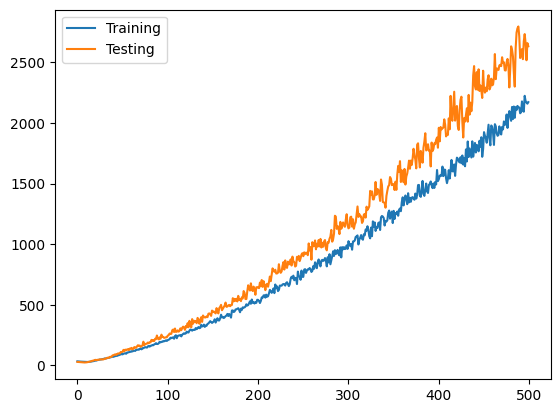

In [ ]:
plt.plot(history.history["loss"],label="Training")
plt.plot(history.history["val_loss"],label="Testing")
plt.legend()
plt.show()

### Removing overfitting using callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=9,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(27,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_final=model.fit(X_train,Y_train,epochs=500,callbacks=callback,validation_data=(X_test,Y_test))

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0490 - loss: 150.3115 - val_accuracy: 0.0152 - val_loss: 189.0704
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0472 - loss: 160.9692 - val_accuracy: 0.0091 - val_loss: 204.2488
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0491 - loss: 152.0231 - val_accuracy: 0.0121 - val_loss: 198.7942
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0605 - loss: 158.2885 - val_accuracy: 0.0091 - val_loss: 197.0258
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0458 - loss: 166.3533 - val_accuracy: 0.0061 - val_loss: 201.1909
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0546 - loss: 168.3044 - val_accuracy: 0.0485 - val_loss: 257.5585
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0358 - loss: 162.6065 - val_accuracy: 0.0212 - val_loss: 224.7968
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0376 - loss: 175

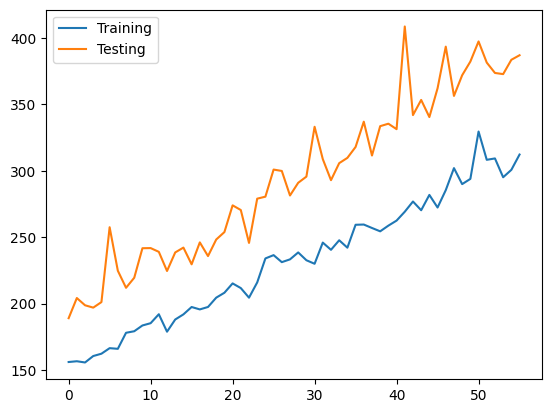

In [ ]:
plt.plot(history_final.history["loss"],label="Training")
plt.plot(history_final.history["val_loss"],label="Testing")
plt.legend()
plt.show()

In [ ]:
y_prediction=model.predict(np.array([0.466681 ,0.390523, 0.608888 ,0.523658, 0.190613, 0.252882, 0.336166, 0.766109, 0.478545]).reshape(1,9))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [ ]:
y_prediction

array([[0.00000000e+00, 0.00000000e+00, 7.44168719e-05, 1.97740383e-11,
        0.00000000e+00, 5.83087886e-18, 1.03933417e-05, 0.00000000e+00,
        5.68265043e-27, 1.12867926e-09, 0.00000000e+00, 2.22419281e-14,
        8.92518477e-32, 0.00000000e+00, 1.94578398e-09, 1.14977991e-35,
        0.00000000e+00, 9.99897957e-01, 5.15817744e-09, 0.00000000e+00,
        1.01835845e-10, 6.95233257e-06, 0.00000000e+00, 5.66354168e-12,
        1.02824879e-05, 0.00000000e+00, 2.24328107e-28]], dtype=float32)

In [ ]:
y_pred=y_prediction.reshape(-1, 9, 3)

In [ ]:
categorical_predictions = np.argmax(y_pred, axis=2)

In [ ]:
categorical_predictions

array([[2, 0, 0, 0, 2, 2, 0, 0, 0]])

In [ ]:
Y_pred=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
Y_pred

array([[0.00000000e+00, 7.21060485e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.62275434e-01, 0.00000000e+00],
       [0.00000000e+00, 7.35216737e-02, 0.00000000e+00, ...,
        0.00000000e+00, 6.78554699e-02, 0.00000000e+00],
       [0.00000000e+00, 5.98902144e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.96312532e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.29584074e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.22470774e-01, 0.00000000e+00],
       [1.09596954e-37, 1.13653176e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.89475521e-01, 0.00000000e+00],
       [8.39993673e-21, 0.00000000e+00, 2.39728417e-22, ...,
        1.64004392e-25, 0.00000000e+00, 8.20541061e-07]], dtype=float32)